# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 3: Unsupervised Learning Techniques
- **Due date:** N/A

# **`Laboratory Exercise #3: Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset`**

# **`Exercise 1: Data Exploration and Preprocessing`**

First few rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Missing values in the dataset:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

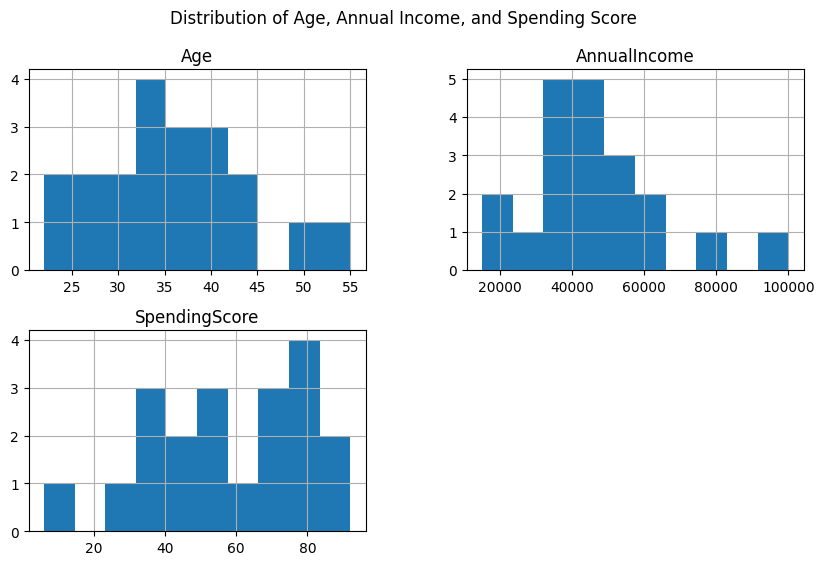


First few rows of the scaled data:
        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738

Statistics of scaled data:
                Age  AnnualIncome  SpendingScore
count  2.000000e+01  2.000000e+01   2.000000e+01
mean   3.524958e-16 -1.110223e-17   2.775558e-18
std    1.025978e+00  1.025978e+00   1.025978e+00
min   -1.658204e+00 -1.641181e+00  -2.408738e+00
25%   -7.269661e-01 -4.880637e-01  -7.799724e-01
50%   -3.604790e-02 -1.662635e-01  -4.588073e-02
75%    5.347106e-01  3.834786e-01   8.487935e-01
max    2.307066e+00  2.917656e+00   1.537005e+00


In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Handle missing values (if any) - Example: fill with the median
# df.fillna(df.median(), inplace=True)

# Data exploration - Histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(10, 6))
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.suptitle('Distribution of Age, Annual Income, and Spending Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Display the scaled data
print("\nFirst few rows of the scaled data:")
print(df_scaled.head())

# Check statistics of scaled data to verify normalization
print("\nStatistics of scaled data:")
print(df_scaled.describe())


# **`Exercise 2: Implementing K-Means Clustering`**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


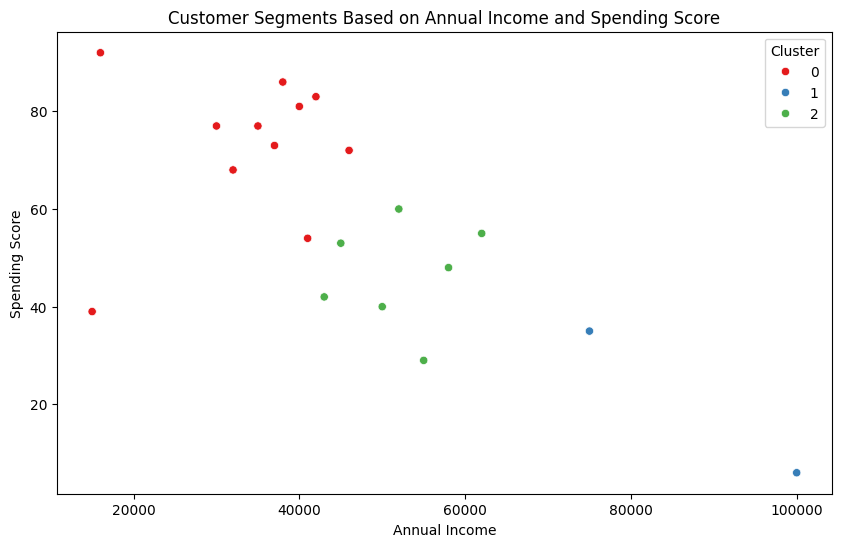

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

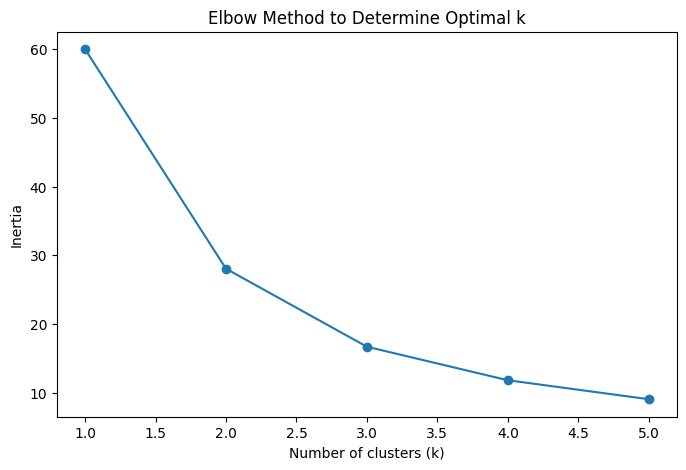

In [3]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Initial model implementation with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

# Elbow Method to determine the optimal k
inertia = []
k_values = range(1, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# **`Exercise 3: Model Evaluation`**

Silhouette Scores for different values of k:
For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

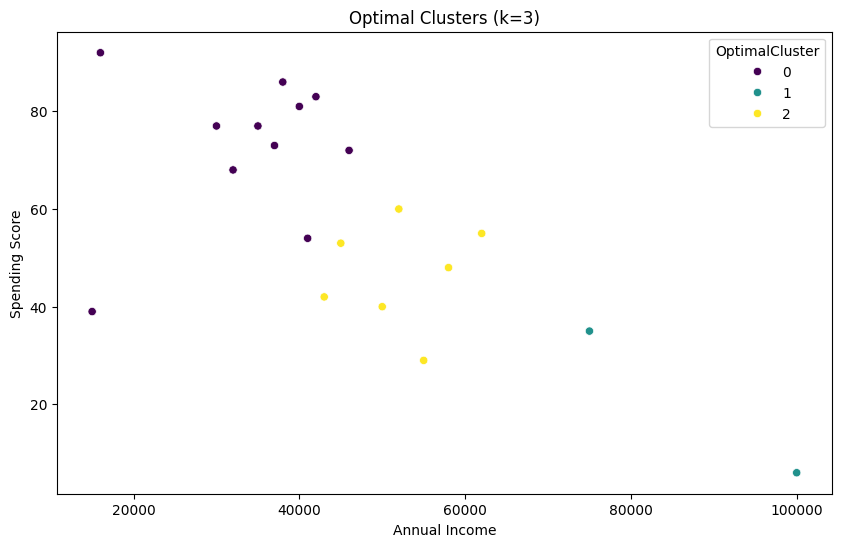


Cluster Summary:
                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0


In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate silhouette scores for different values of k
print("Silhouette Scores for different values of k:")
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='viridis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='OptimalCluster')
plt.savefig('optimal_clusters.png')
plt.show()

# Cluster analysis by averaging the features for each cluster
cluster_summary = df.groupby('OptimalCluster').mean()
print("\nCluster Summary:")
print(cluster_summary)


# **`Exercise 4: Interpretation and Reporting`**

## Exercise #4: Interpretation and Reporting

### 1. Cluster Interpretation

**Cluster 0:**
- **Characteristics:** This cluster consists of customers with moderate annual income and high spending scores. The average annual income is approximately $33,818, and the average spending score is 72.91. This cluster could represent customers who have a decent income and spend a significant portion of it.

**Cluster 1:**
- **Characteristics:** This cluster is characterized by high annual income and low spending scores. The average annual income is around $87,500, with a spending score of 20.50. This group may include affluent customers who are more conservative with their spending.

**Cluster 2:**
- **Characteristics:** Customers in this cluster have an average annual income of $52,143 and a spending score of 46.71. This cluster represents customers with moderate income and moderate spending habits.

### 2. Report

#### Data Exploration and Preprocessing

- **First Few Rows of the Dataset:**

| CustomerID | Age | AnnualIncome | SpendingScore |
|------------|-----|--------------|---------------|
| 1          | 22  | 15000        | 39            |
| 2          | 35  | 40000        | 81            |
| 3          | 26  | 30000        | 77            |
| 4          | 40  | 50000        | 40            |
| 5          | 55  | 100000       | 6             |

- **Missing Values in the Dataset:**

| Column         | Missing Values |
|----------------|----------------|
| CustomerID     | 0              |
| Age            | 0              |
| AnnualIncome   | 0              |
| SpendingScore  | 0              |

- **First Few Rows of the Scaled Data:**

| Age      | AnnualIncome | SpendingScore |
|----------|--------------|---------------|
| -1.658204 | -1.641181    | -0.894674     |
| -0.096128 | -0.300347    | 1.032316      |
| -1.177565 | -0.836681    | 0.848794      |
| 0.504671  | 0.235987     | -0.848794     |
| 2.307066  | 2.917656     | -2.408738     |

- **Statistics of Scaled Data:**

| Statistic | Age          | AnnualIncome | SpendingScore |
|-----------|--------------|--------------|---------------|
| Count     | 20           | 20           | 20            |
| Mean      | 3.524958e-16 | -1.110223e-17 | 2.775558e-18  |
| Std       | 1.025978e+00 | 1.025978e+00 | 1.025978e+00  |
| Min       | -1.658204    | -1.641181    | -2.408738     |
| 25%       | -0.726966    | -0.488064    | -0.779972     |
| 50%       | -0.036048    | -0.166264    | -0.045880     |
| 75%       | 0.534711     | 0.383479     | 0.848794      |
| Max       | 2.307066     | 2.917656     | 1.537005      |

#### K-Means Clustering

- **Silhouette Scores for Different Values of k:**

  ```plaintext
  For k=2, the silhouette score is 0.409
  For k=3, the silhouette score is 0.403
  For k=4, the silhouette score is 0.381
  For k=5, the silhouette score is 0.370
```

### Optimal Number of Clusters:

Based on the silhouette scores and the Elbow Method, **k=3** is determined to be the optimal number of clusters.

### Cluster Summary:

| OptimalCluster | CustomerID | Age        | AnnualIncome | SpendingScore |
|----------------|------------|------------|--------------|---------------|
| 0              | 9.272727   | 30.090909  | 33818.181818 | 72.909091     |
| 1              | 6.000000   | 52.500000  | 87500.000000 | 20.500000     |
| 2              | 13.714286  | 40.000000  | 52142.857143 | 46.714286     |

### 3. Visualizations

- **Optimal Clusters Visualization:**
/content/optimal_clusters.png
  - *`Note: You have to run the cells to see click and see the visualization.`*

### 4. Insights and Conclusion

After analyzing the clusters, the following insights can be drawn:

- **Cluster 0** represents younger customers with moderate incomes and higher spending scores. These could be more value-driven customers who tend to spend a significant amount of their earnings on products/services.
- **Cluster 1** consists of older customers with high incomes but lower spending scores, indicating that despite having the means, they may be more selective or conservative with their purchases.
- **Cluster 2** is made up of middle-aged customers with moderate income and moderate spending scores, possibly representing a balanced customer profile with neither extreme spending behavior nor high earnings.
